In [1]:
%reload_ext autoreload
%autoreload 2

import os, sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages")

In [2]:
import numpy as np
import hmm
import gmm

from utils import *

# HWK3 -  Implementation  of HMM

* Alejandro de la Concha (alexdavidhalo@gmail.com)

* Tong ZHAO (tong.zhao@eleves.enpc.fr)

Read files

In [3]:
data_train = read_file("classification_data_HWK2\EMGaussian.data")
data_test = read_file("classification_data_HWK2\EMGaussian.test")

## GMM

We train a Gaussian mixture model and plot the estimated distributions

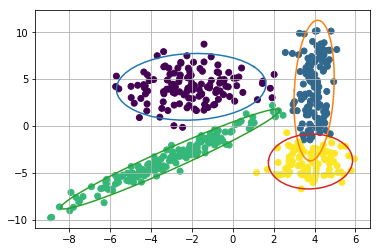

In [4]:
GMM = gmm.EM_gaussian(data_train, max_iter = 100, k = 4)
labels = GMM["tau"].argmax(1)
plot_cluster_EM_gaussian(data_train, labels, mu = GMM["mu"], sigma = GMM["sigma"], k = 4)

In [5]:
loss_train = gmm.MixtureGaus_loglike(data_train, GMM["alpha"], GMM["mu"], GMM["sigma"])
loss_test = gmm.MixtureGaus_loglike(data_test, GMM["alpha"], GMM["mu"], GMM["sigma"])

print("Log likelihood loss for GMM model (train): ", loss_train)
print("Log likelihood loss for GMM model (test ): ", loss_test)

Log likelihood loss for GMM model (train):  -4.6554313498433
Log likelihood loss for GMM model (test ):  -4.817956307244343


## HMM

The Hidden Markov Model is initialized by the GMM model.

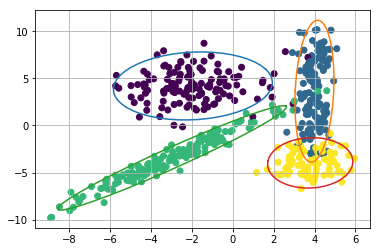

In [6]:
HMM = hmm.HMM_LOG(4, data_train, GMM["mu"], GMM["sigma"])
HMM.train()
plot_cluster_EM_gaussian(data_train, HMM.preds, mu = HMM.mu, sigma = HMM.sigma, k = 4)

In [7]:
_, hmm_alpha = np.unique(HMM.preds, return_counts = True)
hmm_alpha = hmm_alpha / HMM.n

loss_train = gmm.MixtureGaus_loglike(data_train, hmm_alpha, HMM.mu, HMM.sigma)
loss_test = gmm.MixtureGaus_loglike(data_test, hmm_alpha, HMM.mu, HMM.sigma)

print("Log likelihood loss for HMM model (train): ", loss_train)
print("Log likelihood loss for HMM model (test ): ", loss_test)

Log likelihood loss for HMM model (train):  -4.658879790481439
Log likelihood loss for HMM model (test ):  -4.816554189248535
